Tennis Data 

In [30]:
library(tidyverse)
library(tidymodels)
library(repr)
options(repr.matrix.max.rows = 6)

In [31]:
#read_data
url <- "https://drive.google.com/uc?export=download&id=1_MECmUXZuuILYeEOfonSGqodW6qVdhsS"
player_stats <- read_csv("https://drive.google.com/uc?export=download&id=1_MECmUXZuuILYeEOfonSGqodW6qVdhsS")
player_stats

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  .default = col_character(),
  X1 = col_double(),
  `Turned Pro` = col_double(),
  Seasons = col_double(),
  Titles = col_double(),
  `Best Season` = col_double(),
  Retired = col_double(),
  Masters = col_double(),
  `Grand Slams` = col_double(),
  `Davis Cups` = col_double(),
  `Team Cups` = col_double(),
  Olympics = col_double(),
  `Weeks at No. 1` = col_double(),
  `Tour Finals` = col_double()
)

See spec(...) for full column specifications.



X1,Age,Country,Plays,Wikipedia,Current Rank,Best Rank,Name,Backhand,Prize Money,⋯,Facebook,Twitter,Nicknames,Grand Slams,Davis Cups,Web Site,Team Cups,Olympics,Weeks at No. 1,Tour Finals
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
0,26 (25-04-1993),Brazil,Right-handed,Wikipedia,378 (97),363 (04-11-2019),Oscar Jose Gutierrez,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,18 (22-12-2001),United Kingdom,Left-handed,Wikipedia,326 (119),316 (14-10-2019),Jack Draper,Two-handed,"$59,040",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,32 (03-11-1987),Slovakia,Right-handed,Wikipedia,178 (280),44 (14-01-2013),Lukas Lacko,Two-handed,"US$3,261,567",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
497,23 (14-03-1996),Netherlands,Left-handed,Wikipedia,495 (60),342 (05-08-2019),Gijs Brouwer,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
498,24 (17-05-1995),Ukraine,NA,Wikipedia,419 (81),419 (20-01-2020),Vladyslav Orlov,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
499,22 (26-03-1997),Tunisia,Left-handed,Wikipedia,451 (69),408 (24-12-2018),Aziz Dougaz,Two-handed,"$61,984",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [32]:
#select for desired coloumns
player_stats_data <- player_stats %>%
        rename(current_rank = "Current Rank",
              best_rank = "Best Rank",
              prize_money = "Prize Money") %>%
        select(current_rank, best_rank, prize_money, Seasons)
player_stats_data

current_rank,best_rank,prize_money,Seasons
<chr>,<chr>,<chr>,<dbl>
378 (97),363 (04-11-2019),NA,NA
326 (119),316 (14-10-2019),"$59,040",NA
178 (280),44 (14-01-2013),"US$3,261,567",14
⋮,⋮,⋮,⋮
495 (60),342 (05-08-2019),NA,NA
419 (81),419 (20-01-2020),NA,NA
451 (69),408 (24-12-2018),"$61,984",2


In [49]:
player_stats_data[] <- lapply(player_stats_data, gsub, pattern="\\$", replacement="")
player_stats_data[]

player_stats_data$prize_money <- gsub("US", "", as.character(player_stats_data$prize_money))

prize_money <- gsub(",", "", as.character(player_stats_data$prize_money)) 

# 24th, 10th, 14th, 27th, 15th, 30th, 4th, 28th, 2nd, 6th, 30th, 33rd, 26th, 24th, 48th, 41st, 24th, 15th”

prize_money0 <- gsub("11th all-time leader in earnings", "", as.character(player_stats_data$prize_money))
prize_money1 <- gsub("10th all-time leader in earnings", "", as.character(player_stats_data$prize_money))
prize_money2 <- gsub("14th all-time leader in earnings", "", as.character(player_stats_data$prize_money))
prize_money3 <- gsub("27th all-time leader in earnings", "", as.character(player_stats_data$prize_money))
prize_money4 <- gsub("15th all-time leader in earnings", "", as.character(player_stats_data$prize_money))
prize_money5 <- gsub("30th all-time leader in earnings", "", as.character(player_stats_data$prize_money))
prize_money6 <- gsub("4th all-time leader in earnings", "", as.character(player_stats_data$prize_money))
prize_money7 <- gsub("28th all-time leader in earnings", "", as.character(player_stats_data$prize_money))
prize_money8 <- gsub("2nd all-time leader in earnings", "", as.character(player_stats_data$prize_money))
prize_money9 <- gsub("6th all-time leader in earnings", "", as.character(player_stats_data$prize_money))
prize_money10 <- gsub("30th all-time leader in earnings", "", as.character(player_stats_data$prize_money))
prize_money11 <- gsub("33th all-time leader in earnings", "", as.character(player_stats_data$prize_money))
prize_money12 <- gsub("26th all-time leader in earnings", "", as.character(player_stats_data$prize_money))
prize_money13 <- gsub("48th all-time leader in earnings", "", as.character(player_stats_data$prize_money))
prize_money14 <- gsub("41th all-time leader in earnings", "", as.character(player_stats_data$prize_money))
prize_money15 <- gsub("24th all-time leader in earnings", "", as.character(player_stats_data$prize_money))
prize_money1

current_rank,best_rank,prize_money,Seasons
<chr>,<chr>,<chr>,<chr>
378 (97),363 (04-11-2019),NA,NA
326 (119),316 (14-10-2019),59040,NA
178 (280),44 (14-01-2013),3261567,14
⋮,⋮,⋮,⋮
495 (60),342 (05-08-2019),NA,NA
419 (81),419 (20-01-2020),NA,NA
451 (69),408 (24-12-2018),61984,2


[1] NA                                           
  [2] "59040"                                      
  [3] "3261567"                                    
  [4] "374093"                                     
  [5] "6091971"                                    
  [6] "1517157"                                    
  [7] "278709"                                     
  [8] "59123"                                      
  [9] "122734"                                     
 [10] "74927"                                      
 [11] "1893476"                                    
 [12] " 10507693"                                  
 [13] "303458"                                     
 [14] "54004"                                      
 [15] "439427"                                     
 [16] "25889586  11th all-time leader in earnings" 
 [17] NA                                           
 [18] "507297"                                     
 [19] "1285541"                                    
 [20] "2722314"                                    
 [21] "10821168"                                   
 [22] "11912152"                                   
 [23] "898701"                                     
 [24] "184328"                                     
 [25] "158269"                                     
 [26] "87942"                                      
 [27] "32892"                                      
 [28] "631094"                                     
 [29] NA                                           
 [30] "13470614"                                   
 [31] "100014"                                     
 [32] "43346"                                      
 [33] "246912"                                     
 [34] "127760"                                     
 [35] "4850190"                                    
 [36] "39679"                                      
 [37] "238848"                                     
 [38] "49635"                                      
 [39] "62529"                                      
 [40] "2301746"                                    
 [41] "827193"                                     
 [42] "485912"                                     
 [43] "1062355"                                    
 [44] "60865"                                      
 [45] "7114496"                                    
 [46] NA                                           
 [47] "3186839"                                    
 [48] "4660132"                                    
 [49] "29228"                                      
 [50] " 10581476"                                  
 [51] " 136641"                                    
 [52] NA                                           
 [53] "7217264"                                    
 [54] "33471"                                      
 [55] NA                                           
 [56] "381369"                                     
 [57] "3062847"                                    
 [58] " 8892564"                                   
 [59] NA                                           
 [60] "709278"                                     
 [61] "89281"                                      
 [62] NA                                           
 [63] "119601561"                                  
 [64] "826084"                                     
 [65] "71874"                                      
 [66] "1563471"                                    
 [67] "142516"                                     
 [68] "627102"                                     
 [69] "2431474"                                    
 [70] "1453933"                                    
 [71] "64275"                                      
 [72] NA                                           
 [73] "1701922"                                    
 [74] "191218"                                     
 [75] "12533"                                      
 [76] NA                                           
 [77] "311015"                                    

In [35]:
current_rank_change <- gsub("\\s*(\\([^()]*(?:(?1)[^()]*)*\\))", "", player_stats_data$best_rank, perl=TRUE)

best_rank_change <- gsub("\\s*(\\([^()]*(?:(?1)[^()]*)*\\))", "", player_stats_data$current_rank, perl=TRUE)


In [67]:
player_stats_mutate <- mutate(player_stats_data,
    prize_money = prize_money,
    current_rank = current_rank_change,
    best_rank = best_rank_change
)
player_stats_mutate


player_stats <- player_stats_mutate %>%
  mutate(across(current_rank:Seasons, as.integer))
player_stats

stats <- na.omit(player_stats)
stats

current_rank,best_rank,prize_money,Seasons
<chr>,<chr>,<chr>,<chr>
363,378,NA,NA
316,326,59040,NA
44,178,3261567,14
⋮,⋮,⋮,⋮
342,495,NA,NA
419,419,NA,NA
408,451,61984,2


Warning message:
“Problem with `mutate()` input `..1`.
ℹ NAs introduced by coercion
ℹ Input `..1` is `across(current_rank:Seasons, as.integer)`.”
Warning message in fn(col, ...):
“NAs introduced by coercion”


current_rank,best_rank,prize_money,Seasons
<int>,<int>,<int>,<int>
363,378,NA,NA
316,326,59040,NA
44,178,3261567,14
⋮,⋮,⋮,⋮
342,495,NA,NA
419,419,NA,NA
408,451,61984,2


current_rank,best_rank,prize_money,Seasons
<int>,<int>,<int>,<int>
44,178,3261567,14
130,236,374093,2
17,183,6091971,11
⋮,⋮,⋮,⋮
137,416,354975,3
394,397,40724,1
408,451,61984,2


In [68]:
#create_training_data
player_stats_split <- initial_split(stats, prop = 0.70, strata = prize_money)
player_train <- training(player_stats_split)
player_test <- testing(player_stats_split)


player_train
player_test

current_rank,best_rank,prize_money,Seasons
<int>,<int>,<int>,<int>
44,178,3261567,14
130,236,374093,2
17,183,6091971,11
⋮,⋮,⋮,⋮
137,416,354975,3
394,397,40724,1
408,451,61984,2


current_rank,best_rank,prize_money,Seasons
<int>,<int>,<int>,<int>
213,307,278709,1
104,104,74927,3
17,22,1893476,3
⋮,⋮,⋮,⋮
70,114,1805758,8
99,167,484561,3
92,103,414637,4


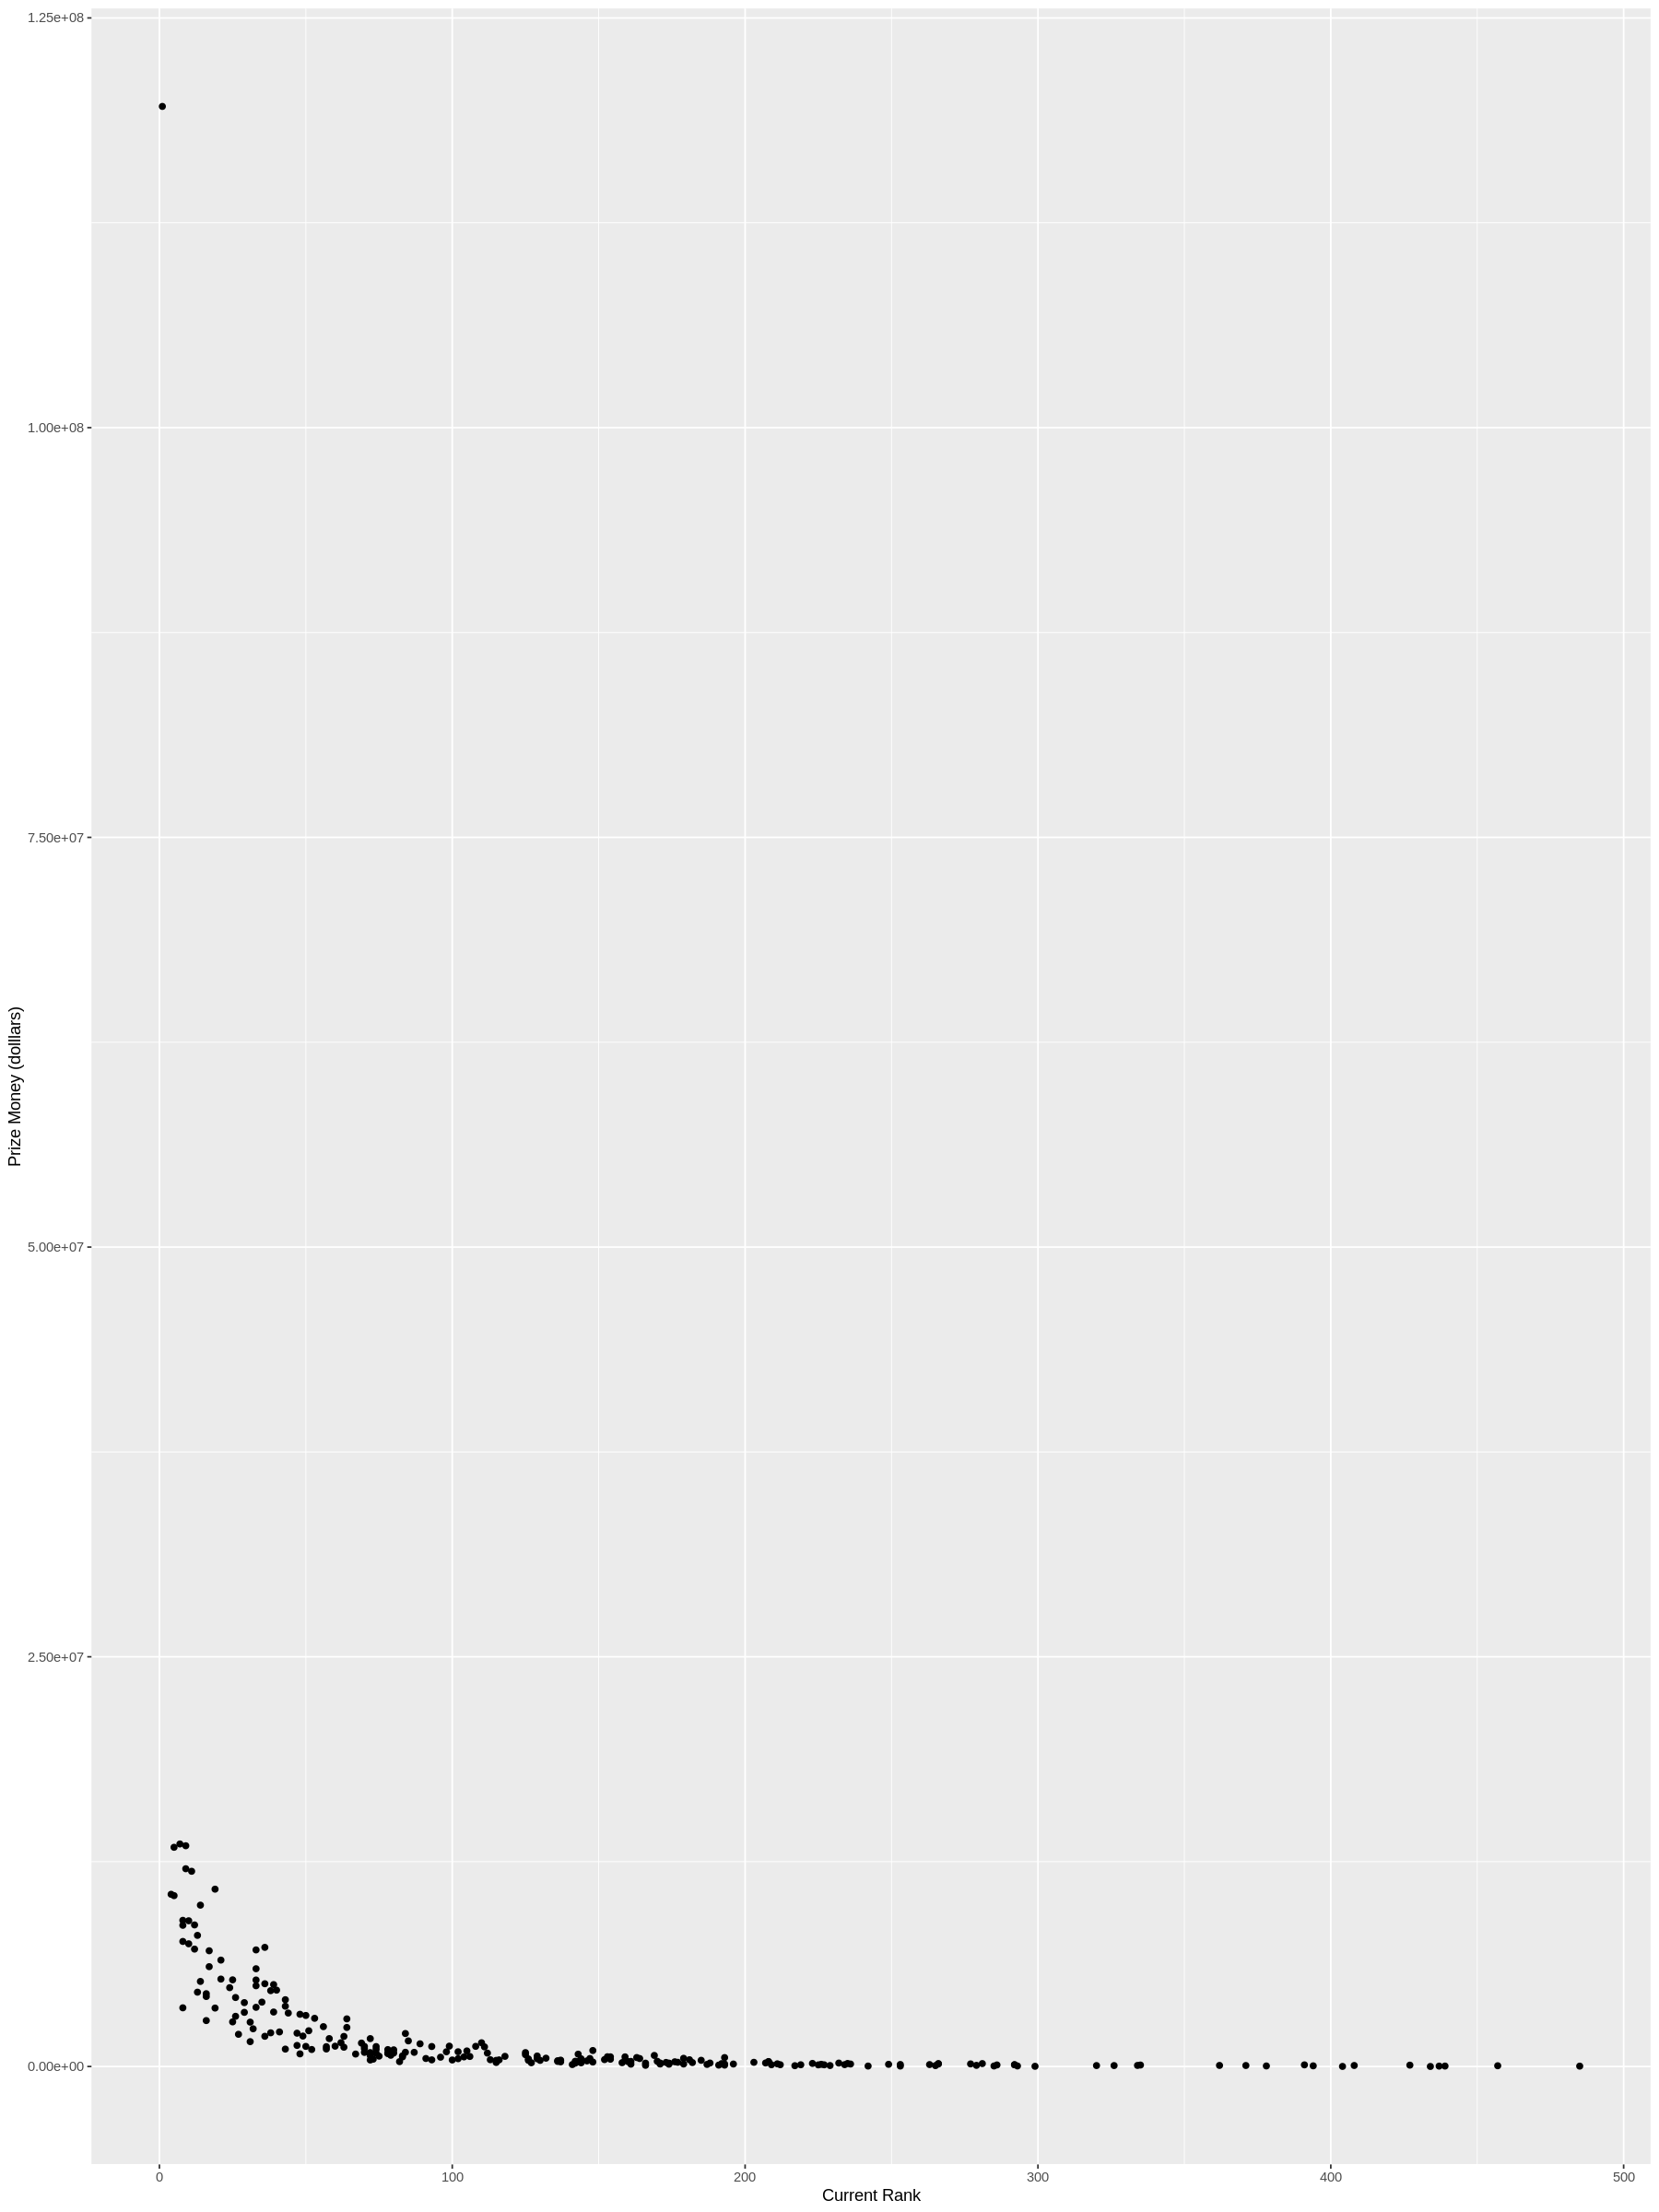

In [77]:
options(repr.plot.width = 15, repr.plot.height = 20)

player_plot <- ggplot(player_train, aes(x = current_rank, y = prize_money)) + 
    geom_point() +
    labs(x = "Current Rank", y = "Prize Money (dolllars)")
player_plot

Expected outcomes and significance:
We expect to find the relationship between player ranking and total amount of prize money earned over a player’s career. These findings would show whether or not having a higher ranking in tennis actually earns a player more money overall. Furthermore, we could wonder if age has a relation to their overall rank and if on average, players had their best rank achieved at a relatively younger age or earlier on in their career. Eventually this can let us think about the best rank’s relation to the number of seasons played by each player. Lastly, we could question if players are being fairly compensated for their work based on ranking and seasons played. 
